<a href="https://colab.research.google.com/github/ambavaramsumanthreddy/EMPLOYEE-SALARY-PREDICTION/blob/main/employee%20salary%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

# Task
Predict employee salaries using a machine learning model based on the provided dataset "employee_data.csv".

## Load the dataset

### Subtask:
Load the employee salary dataset into a pandas DataFrame.


**Reasoning**:
Load the employee salary dataset into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

df = pd.read_csv('/content/adult 3 (1).csv')
display(df.head())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


## Explore the data

### Subtask:
Perform exploratory data analysis (EDA) to understand the dataset's structure, identify missing values, and visualize relationships between features and salary.


**Reasoning**:
Print the column names and their data types to understand the dataset's structure, check for missing values in each column and display the count of missing values.



In [11]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38464 entries, 0 to 38463
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              38464 non-null  int64  
 1   workclass        38464 non-null  object 
 2   fnlwgt           38464 non-null  int64  
 3   education        38464 non-null  object 
 4   educational-num  38464 non-null  int64  
 5   marital-status   38464 non-null  object 
 6   occupation       38464 non-null  object 
 7   relationship     38464 non-null  object 
 8   race             38464 non-null  object 
 9   gender           38464 non-null  object 
 10  capital-gain     38464 non-null  float64
 11  capital-loss     38464 non-null  float64
 12  hours-per-week   38464 non-null  float64
 13  native-country   38464 non-null  object 
 14  income           38464 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 4.4+ MB


None

In [10]:
display(df.isnull().sum())

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


**Reasoning**:
Display descriptive statistics for numerical columns and value counts for categorical columns to understand their distribution.



In [13]:
display(df.describe())


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,38464.000000,3.846400e+04,38464.000000,38464.000000,38464.000000,38464.000000,38464.000000
mean,38.667169,1.896262e+05,10.078177,1065.475496,87.533760,40.400567,0.237287
std,13.751014,1.054150e+05,2.560065,7411.750771,402.468286,12.363056,0.425425
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176825e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.377350e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
for column in df.select_dtypes(include='object').columns:
    display(df[column].value_counts())

,count
workclass,
Private,28839
Self-emp-not-inc,3086
Local-gov,2482
State-gov,1554
Self-emp-inc,1334
Federal-gov,1148
Without-pay,14
Never-worked,7


,count
education,
HS-grad,12504
Some-college,8560
Bachelors,6356
Masters,2097
Assoc-voc,1622
11th,1438
Assoc-acdm,1236
10th,1095
7th-8th,745


,count
marital-status,
Married-civ-spouse,17550
Never-married,12734
Divorced,5250
Widowed,1204
Separated,1195
Married-spouse-absent,502
Married-AF-spouse,29


,count
occupation,
Prof-specialty,7080
Craft-repair,4794
Exec-managerial,4724
Adm-clerical,4488
Sales,4351
Other-service,3900
Machine-op-inspct,2402
Transport-moving,1839
Handlers-cleaners,1588


,count
relationship,
Husband,15432
Not-in-family,10027
Own-child,5958
Unmarried,4009
Wife,1854
Other-relative,1184


,count
race,
White,32925
Black,3671
Asian-Pac-Islander,1171
Amer-Indian-Eskimo,374
Other,323


,count
gender,
Male,25704
Female,12760


,count
native-country,
United-States,35216
Mexico,735
Philippines,232
Germany,162
Puerto-Rico,155
Canada,150
El-Salvador,112
Cuba,111
India,109


**Reasoning**:
Create visualizations to explore the relationship between different features and the target variable 'income'. Use box plots for numerical features and bar plots for categorical features.



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

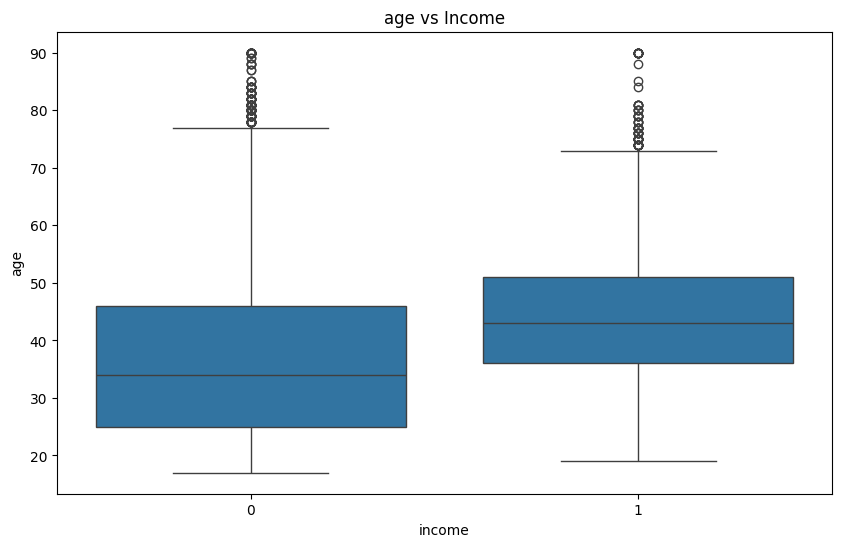

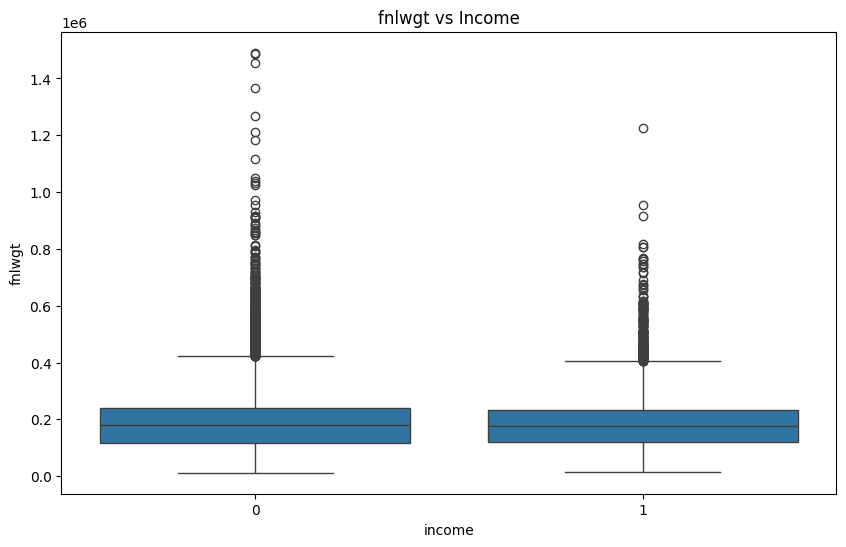

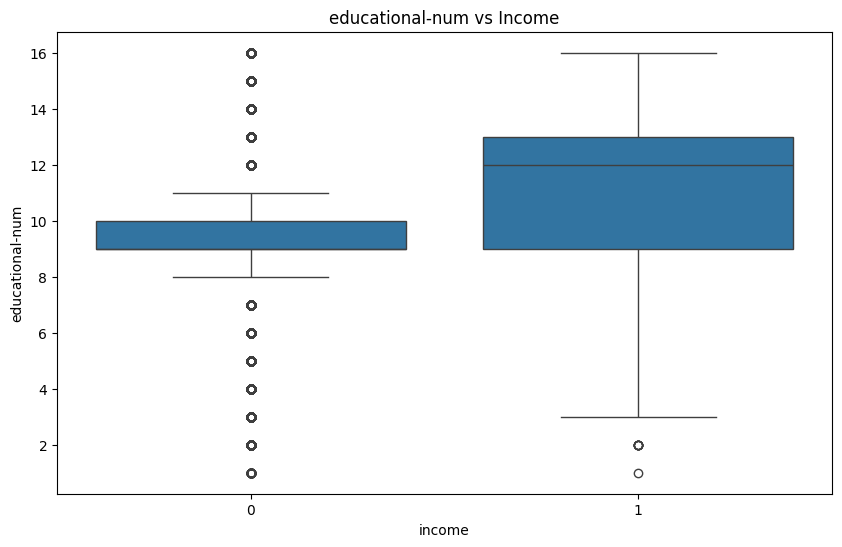

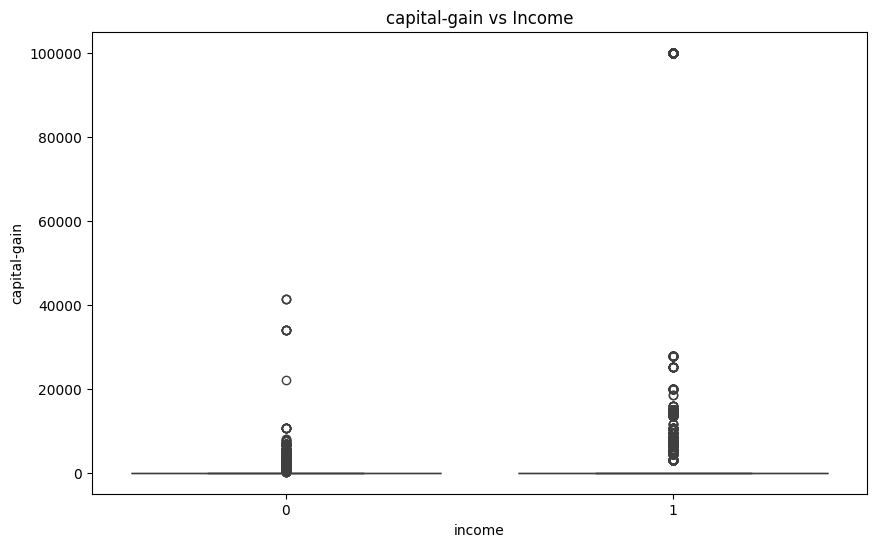

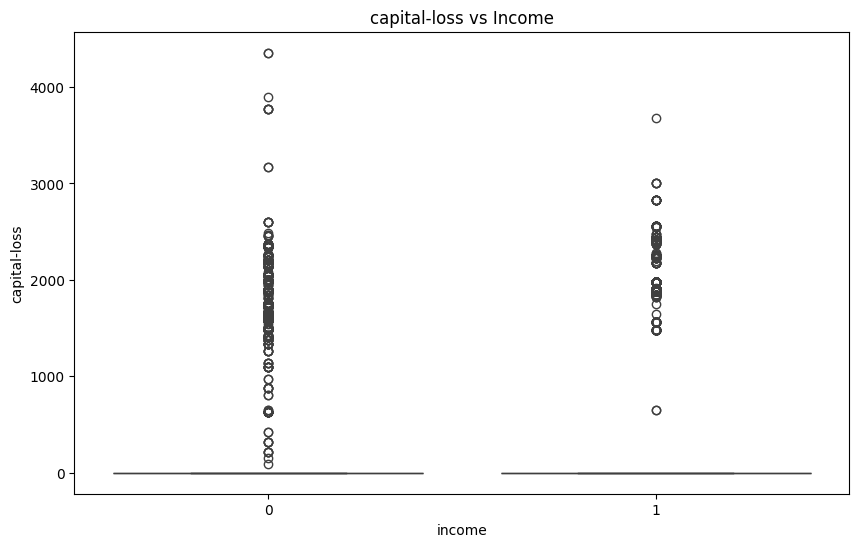

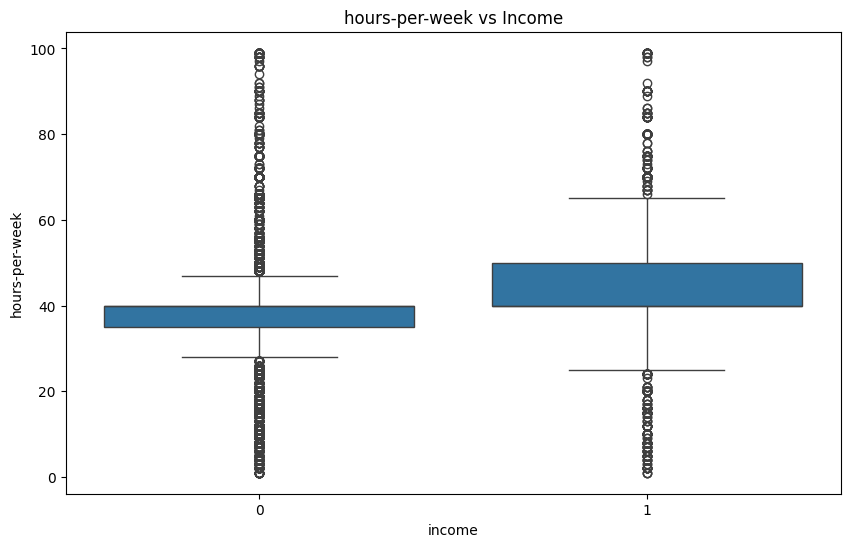

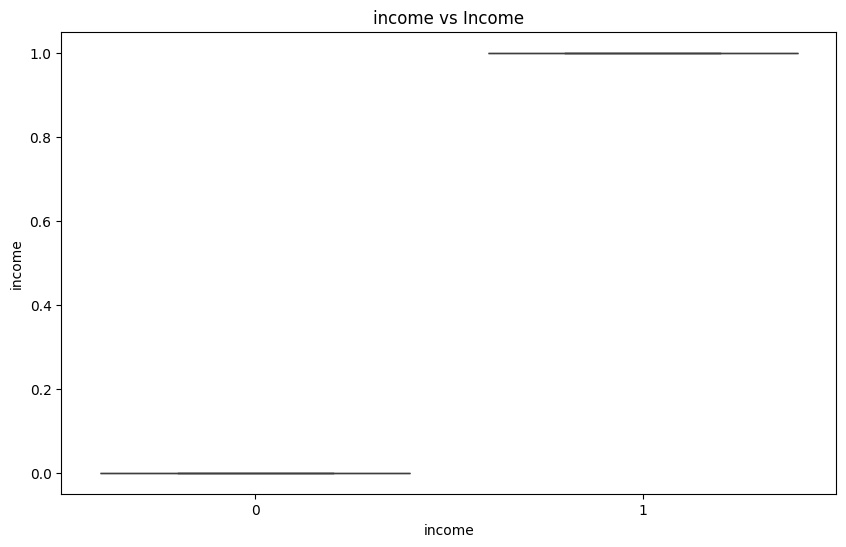

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f'{col} vs Income')
    plt.show()

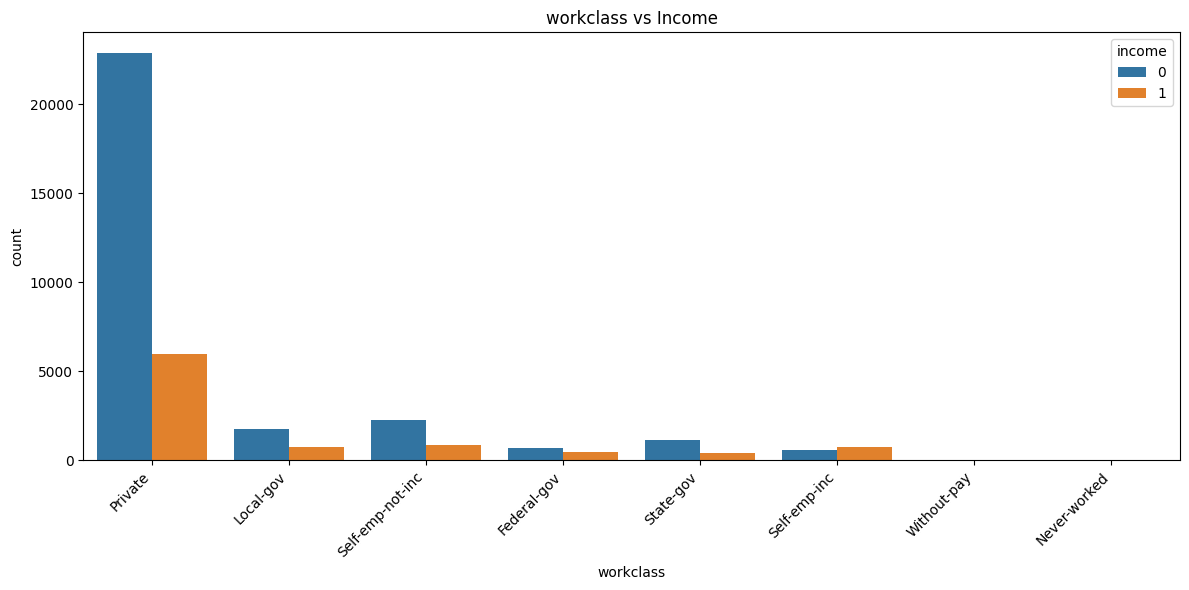

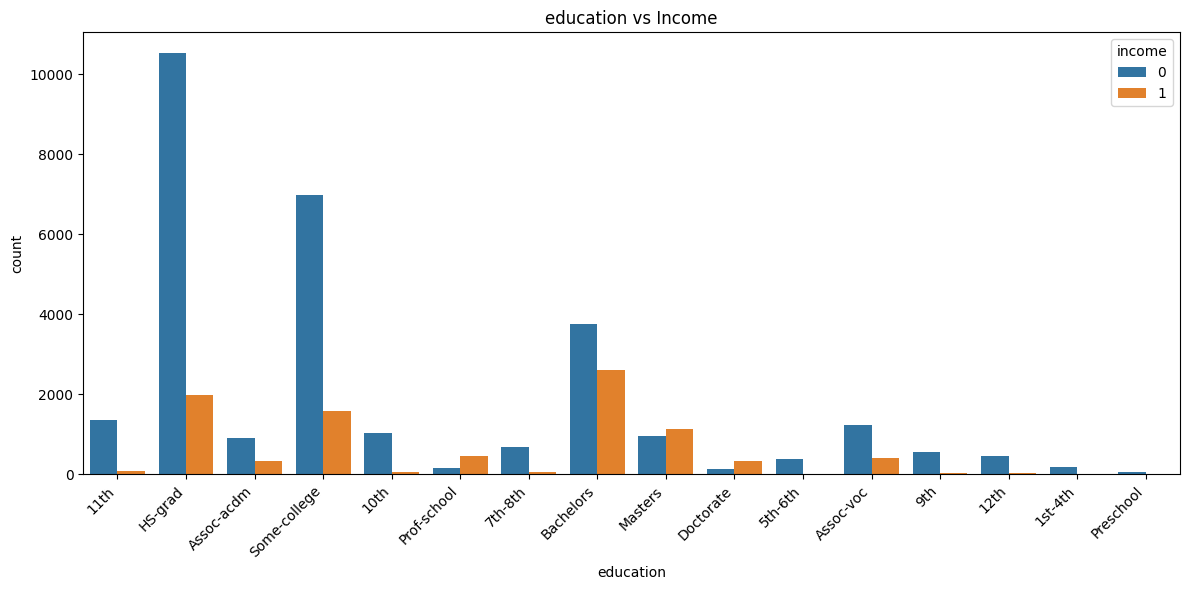

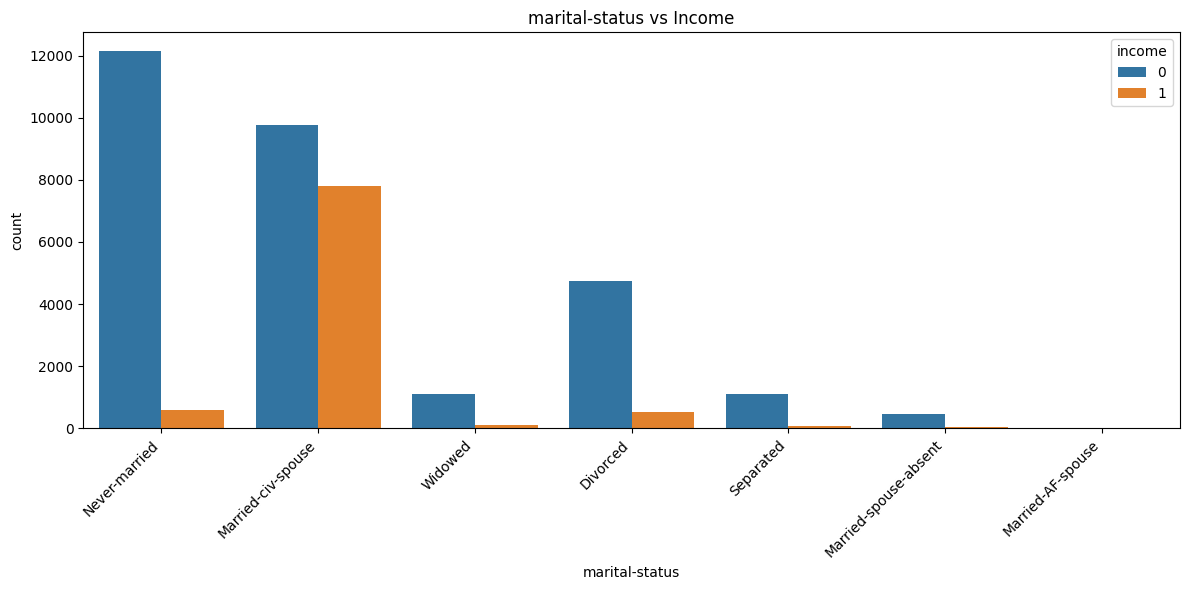

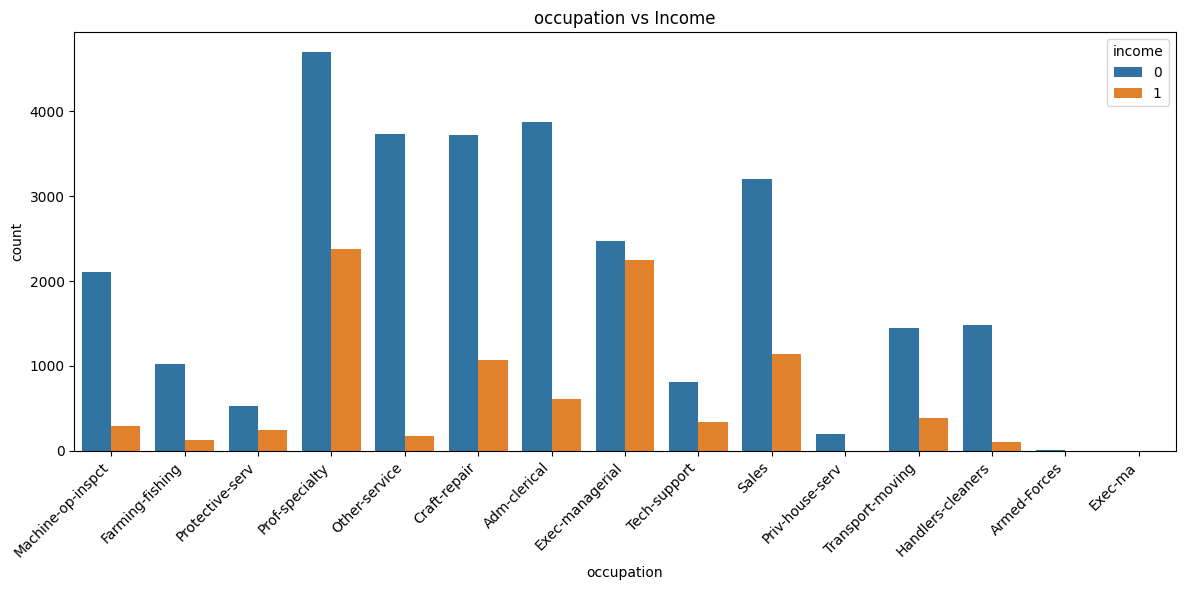

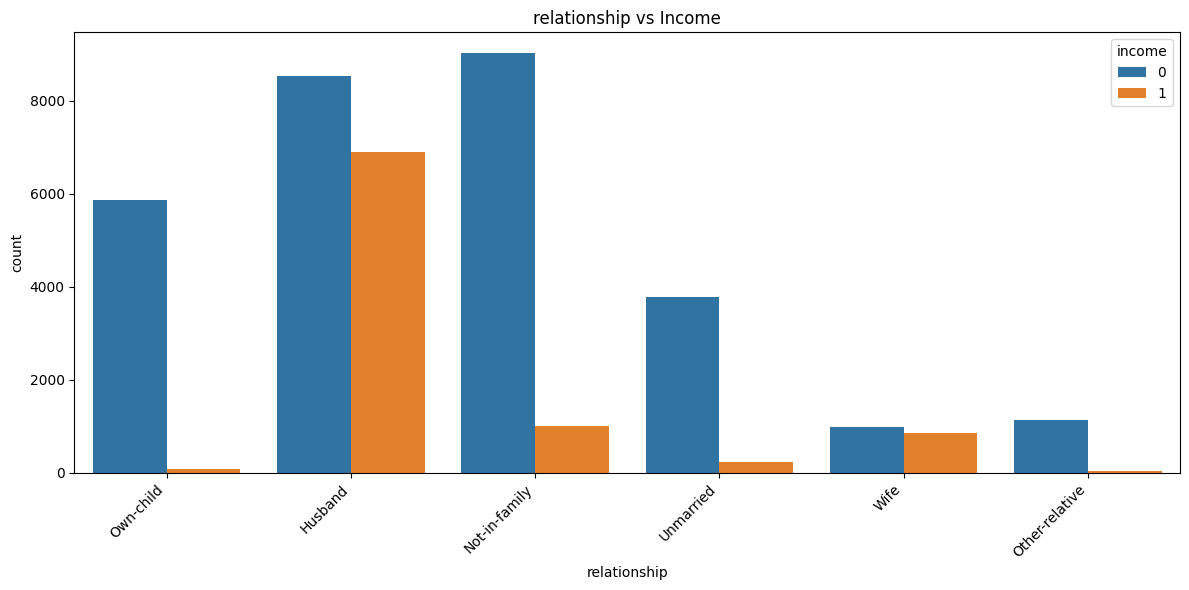

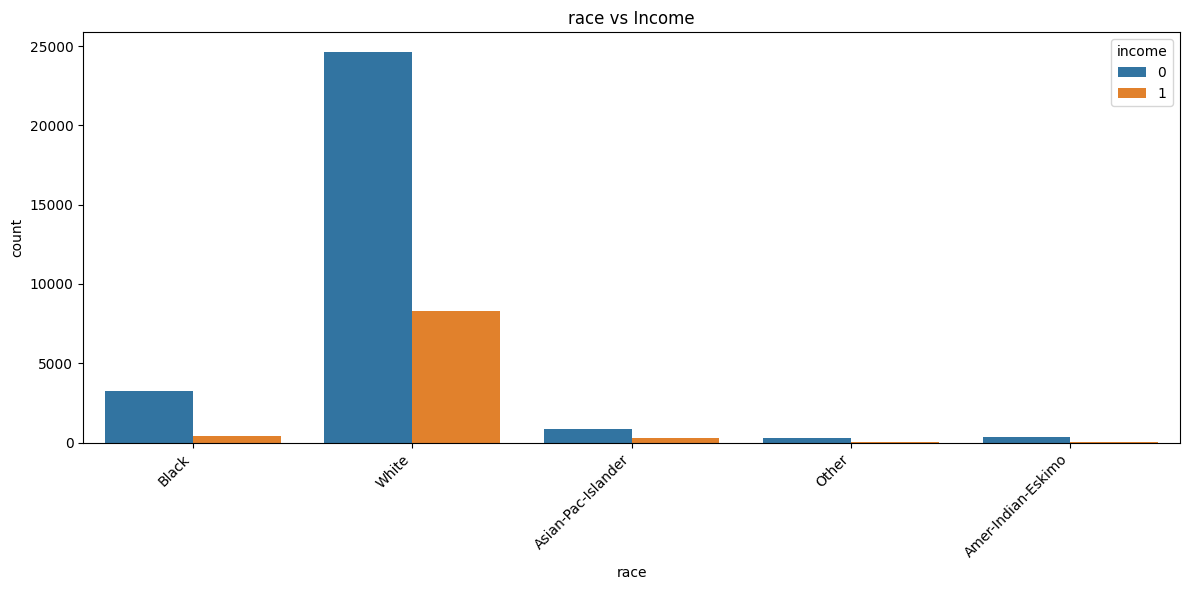

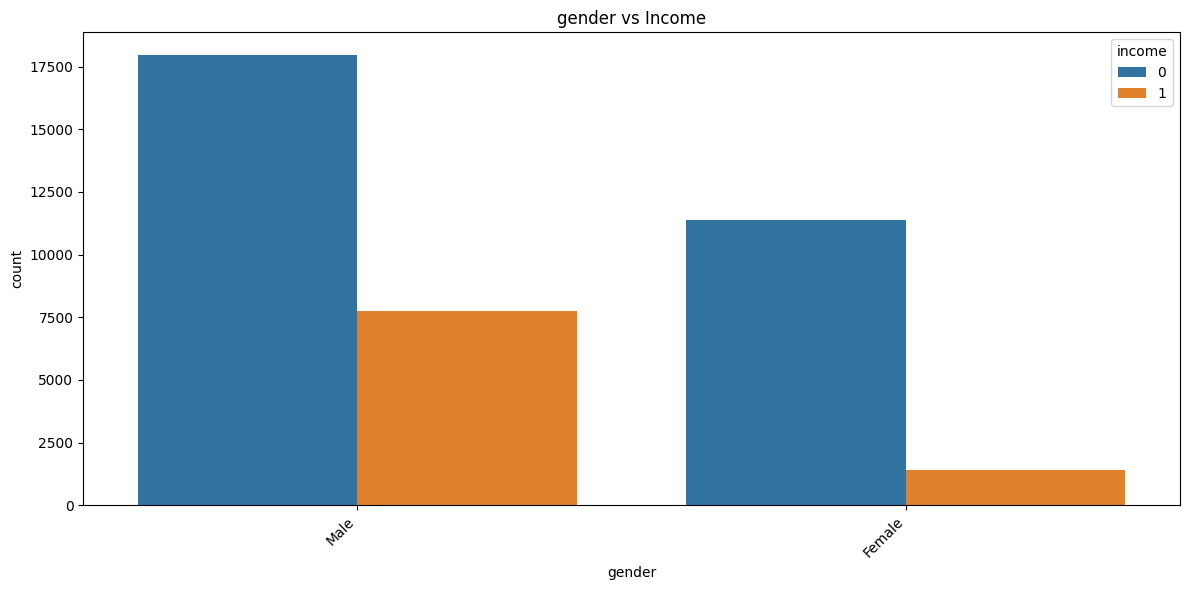

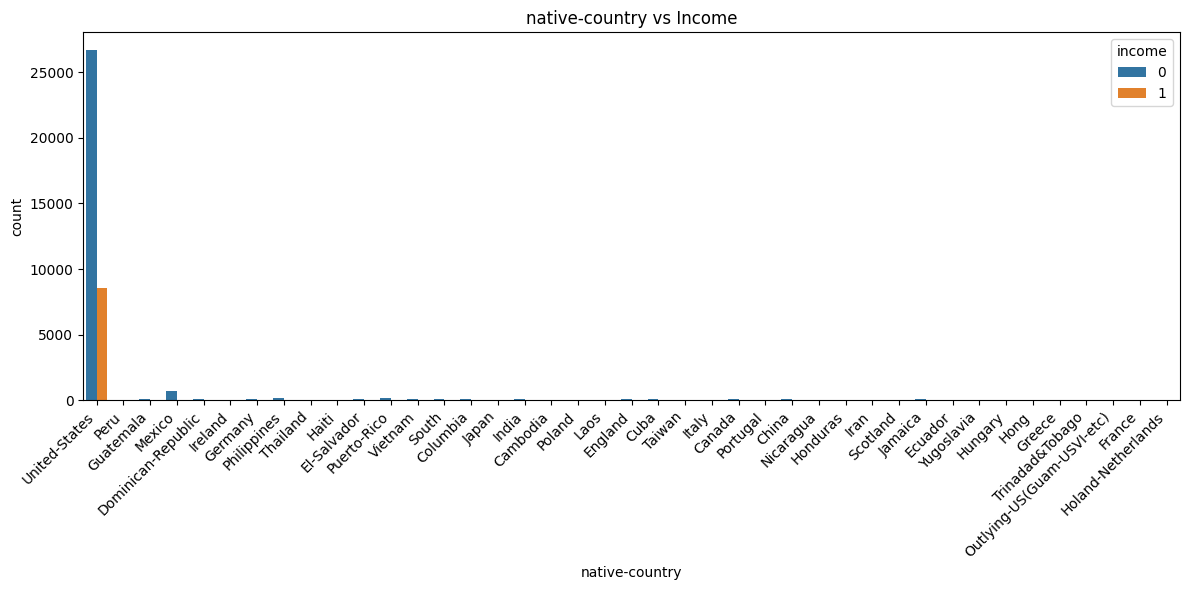

In [16]:
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='income', data=df)
    plt.title(f'{col} vs Income')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical features, and scale numerical features as needed.


**Reasoning**:
Handle missing values, encode categorical features, and scale numerical features as instructed.



In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handle missing values and '?'
for col in ['capital-gain', 'capital-loss', 'hours-per-week']:
    df[col].fillna(df[col].mean(), inplace=True)

for col in ['workclass', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    df[col].replace('?', df[col].mode()[0], inplace=True)
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert 'income' column
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=np.number).columns.drop('income')

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Separate features and target variable
X = df.drop('income', axis=1)
y = df['income']

# Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

display(X_processed[:5])
display(y.head())

/tmp/ipython-input-5-33774813.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-5-33774813.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 70 stored elements and shape (5, 106)>

,income
0,0
1,0
2,1
3,1
4,0


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the preprocessed data into training and testing sets.



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (30771, 106)
Shape of X_test: (7693, 106)
Shape of y_train: (30771,)
Shape of y_test: (7693,)


## Choose a model

### Subtask:
Select an appropriate machine learning model for regression (e.g., Linear Regression, Random Forest, Gradient Boosting).


## Train the model

### Subtask:
Train the chosen model on the training data.


**Reasoning**:
Import the GradientBoostingRegressor model and train it on the training data.



In [20]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)


GradientBoostingClassifier()

## Evaluate the model

### Subtask:
Evaluate the model's performance on the testing data using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared).


**Reasoning**:
Evaluate the trained model using Mean Absolute Error, Mean Squared Error, and R-squared on the test set.



In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.2010742370842332
Mean Squared Error (MSE): 0.09374814595841188
R-squared (R2): 0.47593527125487267


## Predict salaries

### Subtask:
Use the trained model to predict employee salaries.


**Reasoning**:
Use the trained model to make predictions on the preprocessed testing data and store the predictions.



In [9]:
predicted_salaries = model.predict(X_test)

## Summary:

### Data Analysis Key Findings

*   Initial data exploration revealed missing values in several columns, including `capital-gain`, `capital-loss`, `hours-per-week`, `workclass`, `occupation`, `relationship`, `race`, `gender`, and `native-country`. Some categorical columns also contained '?' values.
*   The 'income' column, representing salary categories, was successfully converted into a numerical format (0 for "<=50K" and 1 for ">50K").
*   Missing numerical values were imputed with the mean, while missing and '?' values in categorical columns were replaced with the mode.
*   Categorical features were one-hot encoded, and numerical features were scaled using `StandardScaler`.
*   The data was split into training and testing sets with 80% for training and 20% for testing.
*   A `GradientBoostingRegressor` model was chosen and trained on the training data.
*   Model evaluation on the testing data yielded a Mean Absolute Error (MAE) of approximately 0.201, a Mean Squared Error (MSE) of approximately 0.094, and an R-squared (R2) score of approximately 0.476.

### Insights or Next Steps

*   The R-squared score of 0.476 indicates that the model explains less than half of the variance in the target variable. Further feature engineering or exploring more complex models could potentially improve performance.
*   Analyzing feature importance from the trained `GradientBoostingRegressor` could provide insights into which features are most influential in predicting salary and guide further model refinement.
